In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [120]:
df=pd.read_csv("RELIANCE.NS.csv")
df

,Date,Close,Adj Close,Volume
0,03/01/2000,38.944569,29.684198,28802010.0
1,04/01/2000,42.062302,32.060581,61320457.0
2,05/01/2000,43.710136,33.316589,173426953.0
3,06/01/2000,45.543640,34.714115,101355113.0
4,07/01/2000,48.669109,37.096409,128426756.0
...,...,...,...,...
5750,26/12/2022,2524.050049,2524.050049,2764496.0
5751,27/12/2022,2544.699951,2544.699951,2659749.0
5752,28/12/2022,2544.449951,2544.449951,3442509.0
5753,29/12/2022,2543.300049,2543.300049,3198493.0


In [121]:
df.shape

(5755, 4)

In [122]:
df.isnull().sum()

Date          0
Close        10
Adj Close    10
Volume       10
dtype: int64

In [123]:
df.dropna(inplace=True)

In [124]:
df.shape

(5745, 4)

In [125]:
df[df.duplicated()]

,Date,Close,Adj Close,Volume


In [126]:
df = df.rename(columns={'Adj Close': 'AdjClose'})

In [127]:
df.corr()

,Close,AdjClose,Volume
Close,1.000000,0.999772,-0.322671
AdjClose,0.999772,1.000000,-0.317065
Volume,-0.322671,-0.317065,1.000000


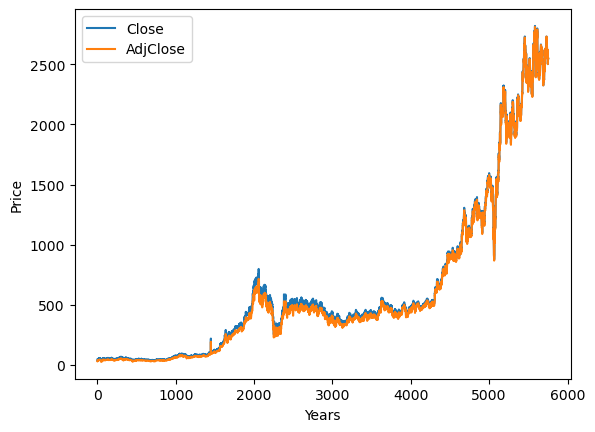

In [128]:
df.Close.plot()
df.AdjClose.plot()
plt.xlabel("Years")
plt.ylabel("Price")
plt.legend()

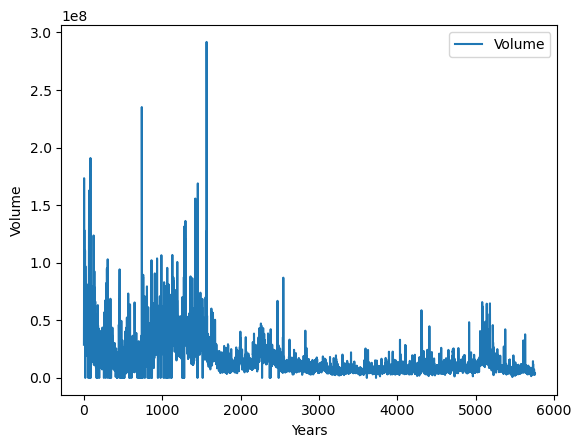

In [129]:
df.Volume.plot()
plt.xlabel("Years")
plt.ylabel("Volume")
plt.legend()

In [130]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [131]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

df["month"] = df.Date.dt.strftime("%m") 
df["year"] = df.Date.dt.strftime("%d") 
df["year"] = df.Date.dt.strftime("%Y") 

In [132]:
df.dtypes

Date        datetime64[ns]
Close              float64
AdjClose           float64
Volume             float64
month               object
year                object
dtype: object

In [133]:
df

,Date,Close,AdjClose,Volume,month,year
0,2000-01-03,38.944569,29.684198,28802010.0,01,2000
1,2000-01-04,42.062302,32.060581,61320457.0,01,2000
2,2000-01-05,43.710136,33.316589,173426953.0,01,2000
3,2000-01-06,45.543640,34.714115,101355113.0,01,2000
4,2000-01-07,48.669109,37.096409,128426756.0,01,2000
...,...,...,...,...,...,...
5750,2022-12-26,2524.050049,2524.050049,2764496.0,12,2022
5751,2022-12-27,2544.699951,2544.699951,2659749.0,12,2022
5752,2022-12-28,2544.449951,2544.449951,3442509.0,12,2022
5753,2022-12-29,2543.300049,2543.300049,3198493.0,12,2022


In [134]:
df = df.set_index("Date")
df

,Close,AdjClose,Volume,month,year
Date,,,,,
2000-01-03,38.944569,29.684198,28802010.0,01,2000
2000-01-04,42.062302,32.060581,61320457.0,01,2000
2000-01-05,43.710136,33.316589,173426953.0,01,2000
2000-01-06,45.543640,34.714115,101355113.0,01,2000
2000-01-07,48.669109,37.096409,128426756.0,01,2000
...,...,...,...,...,...
2022-12-26,2524.050049,2524.050049,2764496.0,12,2022
2022-12-27,2544.699951,2544.699951,2659749.0,12,2022
2022-12-28,2544.449951,2544.449951,3442509.0,12,2022


In [135]:
df.describe()

,Close,AdjClose,Volume
count,5745.000000,5745.000000,5.745000e+03
mean,637.879417,615.592615,1.681692e+07
std,679.242266,682.151473,1.809928e+07
min,31.440351,23.964359,0.000000e+00
25%,101.291473,89.115646,6.334809e+06
50%,446.145996,418.400238,1.016516e+07
75%,675.992249,638.090149,2.036854e+07
max,2819.850098,2811.385742,2.918015e+08


In [136]:
df.corr()

,Close,AdjClose,Volume
Close,1.000000,0.999772,-0.322671
AdjClose,0.999772,1.000000,-0.317065
Volume,-0.322671,-0.317065,1.000000


# Heatmap

Text(0.5, 1.0, 'Closing Price over time')

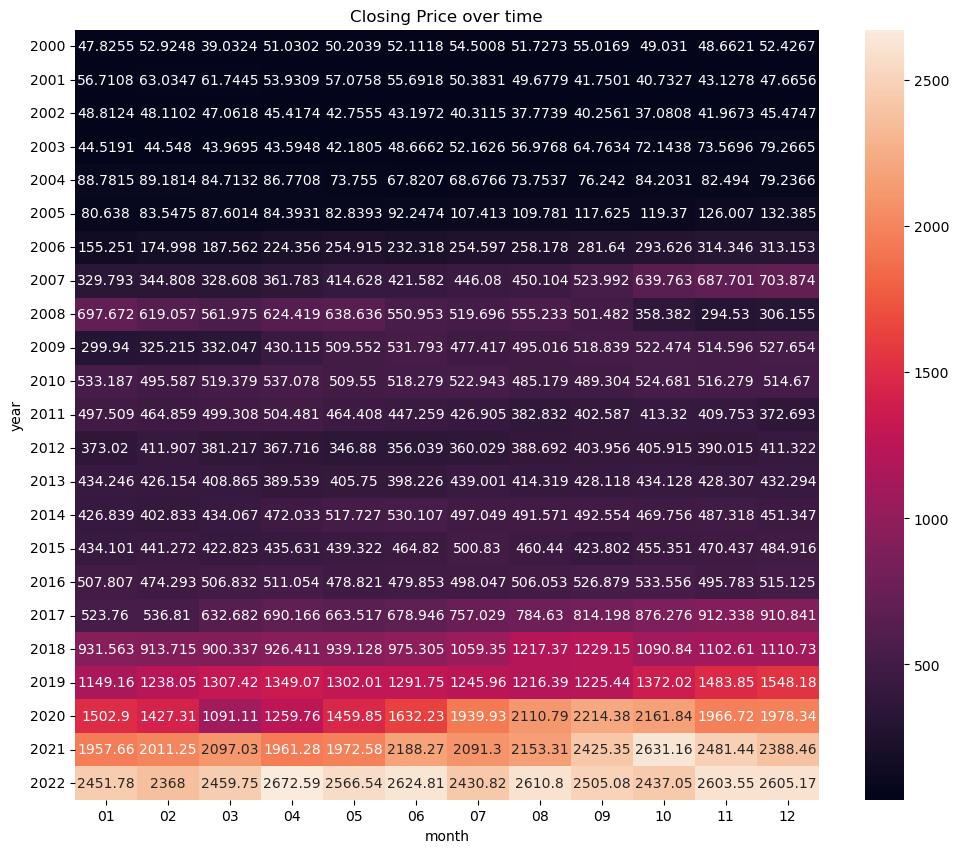

In [137]:
## Closing Price
plt.figure(figsize=(12,10))
heatmap_y_month = pd.pivot_table(data=df,values="Close",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.title("Closing Price over time")

Text(0.5, 1.0, 'Volume over time')

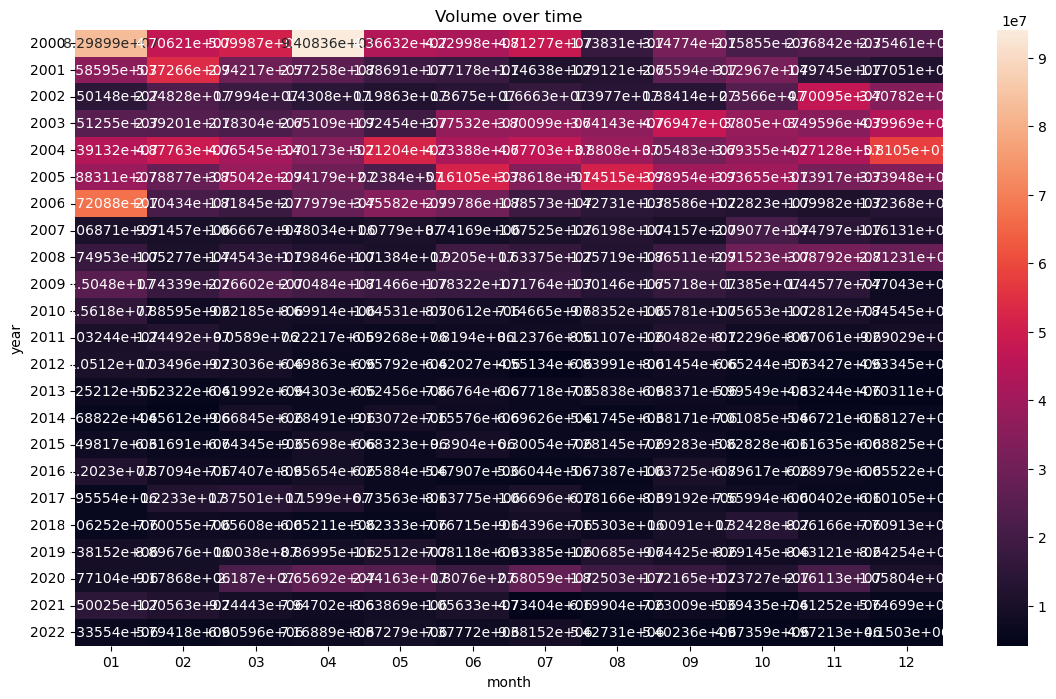

In [138]:
## Volume
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=df,values="Volume",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")
plt.title("Volume over time")

# Histogram

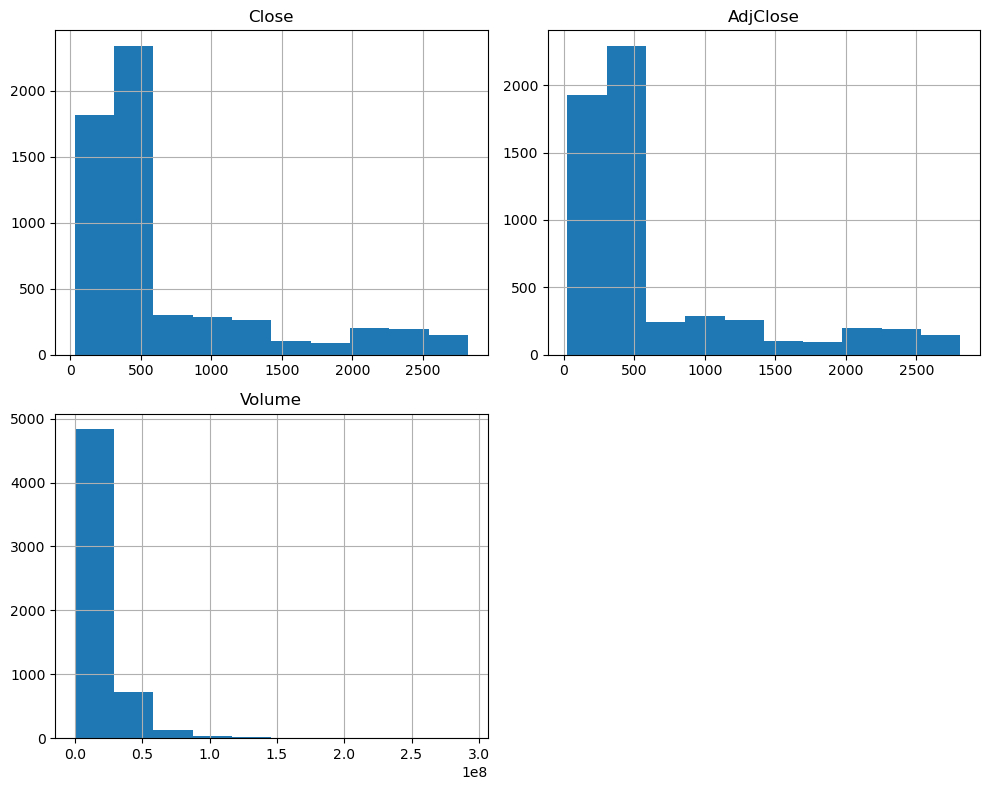

In [139]:
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

# Bar Plot

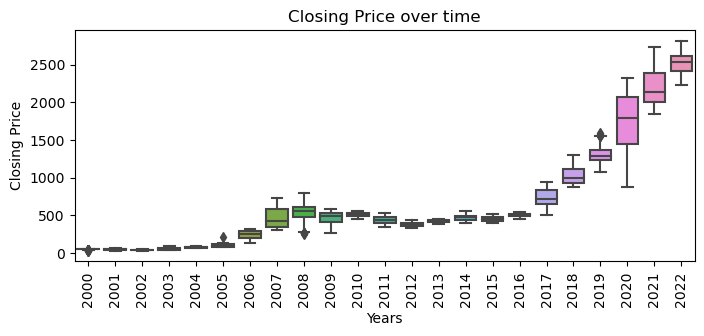

In [140]:
plt.figure(figsize=(8,3))
sns.boxplot(x="year",y="Close",data=df)
plt.title("Closing Price over time")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Closing Price")
plt.show()

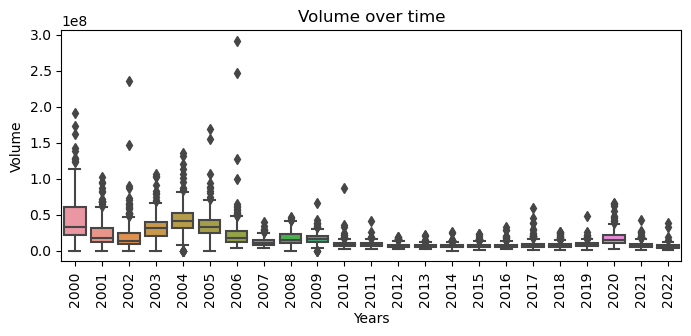

In [141]:
plt.figure(figsize=(8,3))
sns.boxplot(x="year",y="Volume",data=df)
plt.title("Volume over time")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Volume")
plt.show()

# Line Plot

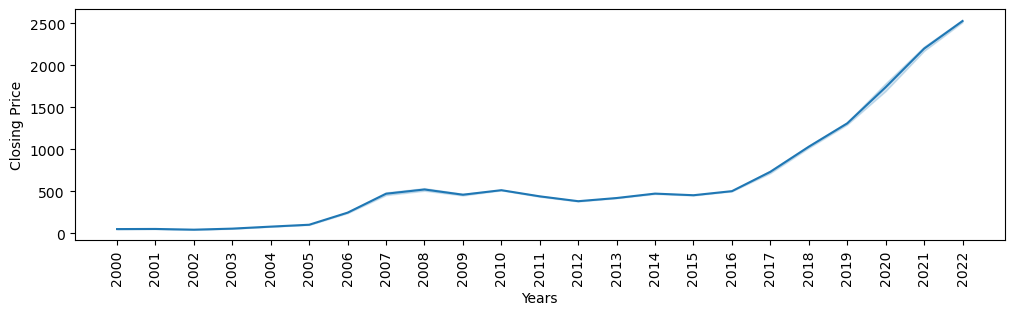

In [142]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Close",data=df) 
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Closing Price")
plt.show()

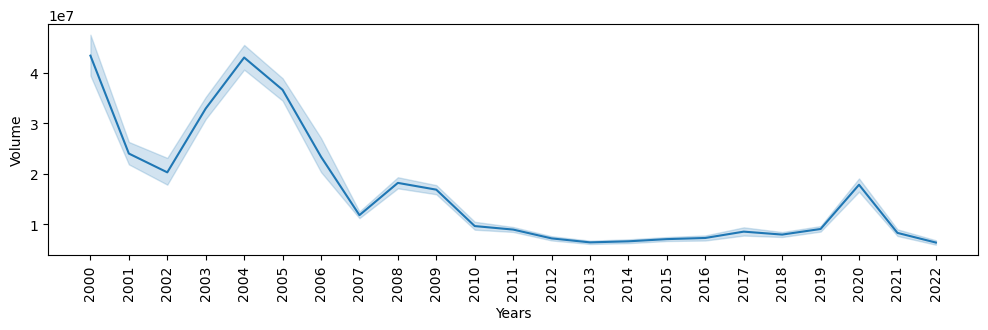

In [143]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Volume",data=df) 
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Volume")
plt.show()

# Scatter Plot

Text(0, 0.5, 'Lagged Value')

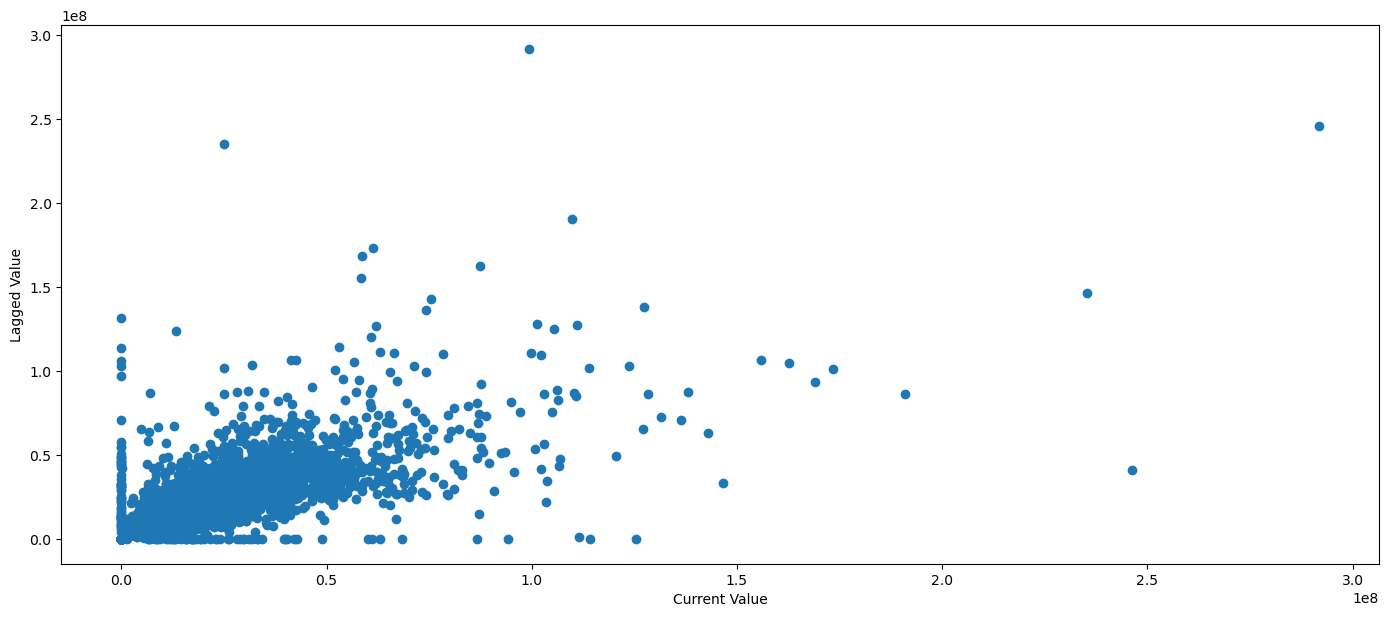

In [144]:
plt.figure(figsize = (17,7))
pd.plotting.lag_plot(df)
plt.xlabel("Current Value")
plt.ylabel("Lagged Value")

# Auto and Partial Auto Correlation Function Plots

In [145]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x600 with 0 Axes>

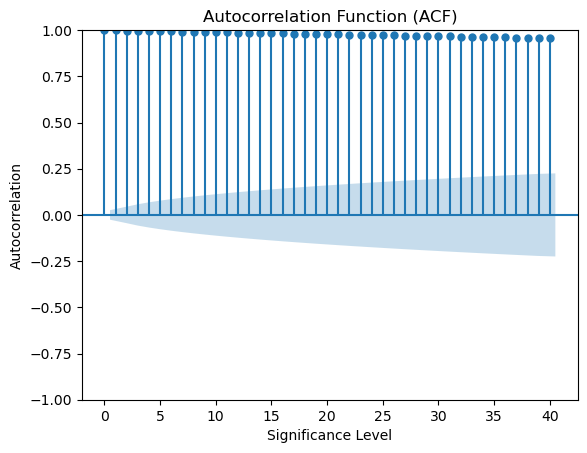

In [146]:
plt.figure(figsize=(12, 6))
plot_acf(df['Close'], lags=40, alpha=0.05)
plt.xlabel('Significance Level')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1200x300 with 0 Axes>

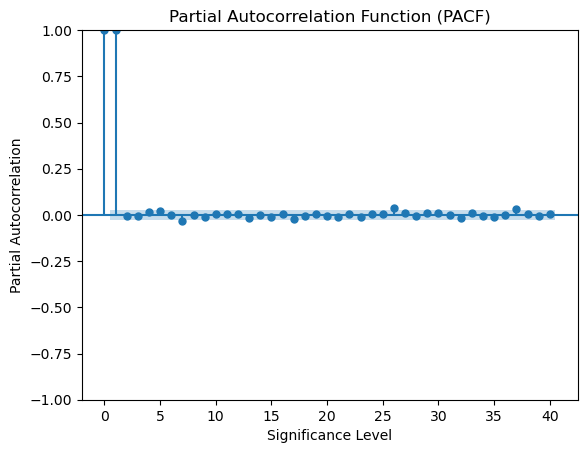

In [147]:
plt.figure(figsize=(12, 3))
plot_pacf(df['Close'], lags=40, alpha=0.05)
plt.xlabel('Significance Level')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Removig Outliers

In [148]:
# Calculate the interquartile range for the "Close" and "Volume" columns
Q1 = df["Close"].quantile(0.25)
Q3 = df["Close"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the "Close" column
df = df[(df["Close"] >= lower_bound) & (df["Close"] <= upper_bound)]

Q1 = df["AdjClose"].quantile(0.25)
Q3 = df["AdjClose"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the "Close" column
df = df[(df["AdjClose"] >= lower_bound) & (df["AdjClose"] <= upper_bound)]



# Calculate the interquartile range for the "Volume" column
Q1 = df["Volume"].quantile(0.25)
Q3 = df["Volume"].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the "Volume" column
df = df[(df["Volume"] >= lower_bound) & (df["Volume"] <= upper_bound)]

In [149]:
df

,Close,AdjClose,Volume,month,year
Date,,,,,
2000-01-03,38.944569,29.684198,28802010.0,01,2000
2000-01-26,49.504631,37.733250,0.0,01,2000
2000-02-03,52.862186,40.292439,43764594.0,02,2000
2000-02-04,53.249001,40.587280,45932185.0,02,2000
2000-02-08,52.978233,40.380886,41561566.0,02,2000
...,...,...,...,...,...
2020-03-27,1055.593994,1045.126465,19225132.0,03,2020
2020-03-30,1020.774109,1010.651855,13951078.0,03,2020
2020-03-31,1103.291870,1092.351318,20441125.0,03,2020


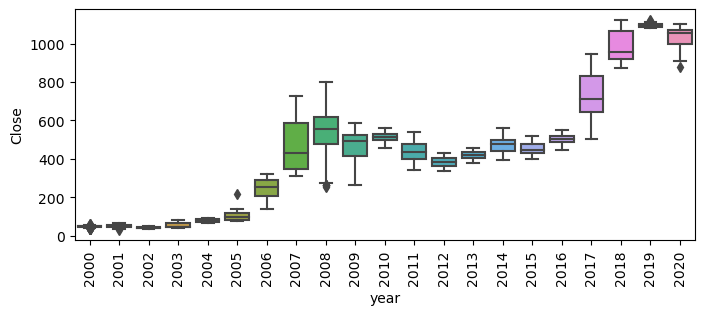

In [150]:
plt.figure(figsize=(8,3))
sns.boxplot(x="year",y="Close",data=df)
plt.xticks(rotation=90)
plt.show()

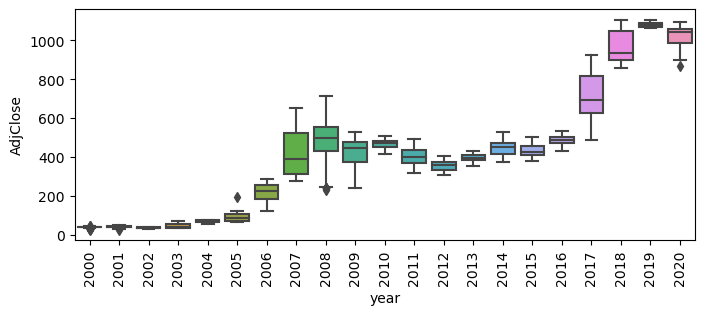

In [151]:
plt.figure(figsize=(8,3))
sns.boxplot(x="year",y="AdjClose",data=df)
plt.xticks(rotation=90)
plt.show()

# Feature Engineering

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
# Daily percentage change in the closing price
df["Close_pct_change"] = df["Close"].pct_change()

# Five-day rolling mean of the closing price
df["Close_rolling_mean"] = df["Close"].rolling(window=5).mean()

# Exponential moving average (EMA) of the closing price with a span of 10 days
df["Close_ema"] = df["Close"].ewm(span=10, adjust=False).mean()

In [157]:
# Relative strength index (RSI)
window = 14
delta = df["Close"].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window).mean()
avg_loss = loss.rolling(window).mean()
rs = avg_gain / avg_loss
df["RSI"] = 100 - (100 / (1 + rs))

In [158]:
# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
df[["Close_pct_change", "Close_rolling_mean", "Close_ema", "RSI"]] = scaler.fit_transform(df[["Close_pct_change", "Close_rolling_mean", "Close_ema", "RSI"]])

In [159]:
df.isnull().sum()

Close                  0
AdjClose               0
Volume                 0
month                  0
year                   0
Close_pct_change       1
Close_rolling_mean     4
Close_ema              0
RSI                   13
dtype: int64

In [160]:
df["Close_pct_change"].fillna(df["Close_pct_change"].mean(), inplace=True)
df["Close_rolling_mean"].fillna(df["Close_rolling_mean"].mean(), inplace=True)
df["RSI"].fillna(df["RSI"].mean(), inplace=True)

In [161]:
df

,Close,AdjClose,Volume,month,year,Close_pct_change,Close_rolling_mean,Close_ema,RSI
Date,,,,,,,,,
2000-01-03,38.944569,29.684198,28802010.0,01,2000,0.330570,0.319423,0.002742,0.511174
2000-01-26,49.504631,37.733250,0.0,01,2000,0.508175,0.319423,0.004538,0.511174
2000-02-03,52.862186,40.292439,43764594.0,02,2000,0.374444,0.319423,0.006579,0.511174
2000-02-04,53.249001,40.587280,45932185.0,02,2000,0.334650,0.319423,0.008314,0.511174
2000-02-08,52.978233,40.380886,41561566.0,02,2000,0.326493,0.014063,0.009688,0.511174
...,...,...,...,...,...,...,...,...,...
2020-03-27,1055.593994,1045.126465,19225132.0,03,2020,0.329467,0.897367,0.917797,0.433979
2020-03-30,1020.774109,1010.651855,13951078.0,03,2020,0.308143,0.924355,0.918418,0.427714
2020-03-31,1103.291870,1092.351318,20441125.0,03,2020,0.383004,0.955757,0.932961,0.481319


# Select Variables

In [164]:
X = df[['AdjClose', 'Volume', 'month', 'year', 'Close_pct_change', 'Close_rolling_mean', 'Close_ema', 'RSI']]
y = df['Close']

In [165]:
X_encoded = pd.get_dummies(X, columns=['month', 'year'])

In [166]:
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Linear Regression

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [168]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_encoded, y_train)
linear_reg_pred = linear_reg.predict(X_test_encoded)

lr_rmse = mean_squared_error(y_test,linear_reg_pred, squared=False)

# R-squared
r2 = r2_score(y_test, linear_reg_pred)

print("RMSE:", lr_rmse)
print("R-squared:", r2)


RMSE: 2.9425029398324627
R-squared: 0.9998677871631748


In [169]:
linear_score = r2_score(y_test, linear_reg_pred)

# Light Gradient Boosting

In [170]:
from lightgbm import LGBMRegressor

In [171]:
# Train the LightGBM model
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train_encoded, y_train)
lgbm_pred = lgbm_model.predict(X_test_encoded)

# Calculate R-squared
r2 = r2_score(y_test,lgbm_pred)
print('R-squared:', r2)

lg_rmse = mean_squared_error(y_test, lgbm_pred, squared=False)
print('RMSE:', lg_rmse)


R-squared: 0.9997090992682859
RMSE: 4.36468092251552


In [172]:
lgbm_score = r2_score(y_test, lgbm_pred)

# ARIMA

In [173]:
from statsmodels.tsa.arima.model import ARIMA

In [174]:
# Set the order (p, d, q) of the ARIMA model
arima_model = ARIMA(y_train, order=(1, 0, 0))
arima_model_fit = arima_model.fit()
arima_pred = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1)

In [175]:
arima_rmse = mean_squared_error(arima_pred, y_test)

# Calculate R-squared score
r2 = r2_score(y_test,arima_pred)
print("R-squared:", r2)
print("RMSE:",arima_rmse)

R-squared: -0.0011998964125152778
RMSE: 65566.34628266247


In [176]:
arima_score = r2_score(y_test,arima_pred)

# XGBoost

In [177]:
import xgboost as xgb

In [178]:
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

xg_rmse = mean_squared_error(y_pred, y_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("RMSE:", xg_rmse)

R-squared: 0.9996860596203816
RMSE: 20.559254666249927


In [179]:
xgboost_score=r2_score(y_test, y_pred)

# Random Forest

In [180]:
from sklearn.ensemble import RandomForestRegressor

In [181]:
model = RandomForestRegressor()

# Train the model
model.fit(X_train_encoded, y_train)

# Make predictions on the test set
rf_pred = model.predict(X_test_encoded)

rf_rmse = mean_squared_error(rf_pred, y_test)

# Evaluate the model
r2 = r2_score(y_test, rf_pred)
print("R-squared:", r2)
print("RMSE:", rf_rmse)

R-squared: 0.9996645957829537
RMSE: 21.96487346664856


In [182]:
rf_score=r2_score(y_test, rf_pred)

# SARIMAX

In [192]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [200]:
model = SARIMAX(y_train, exog=X_train_encoded)
model_fit = model.fit()

In [201]:
# Generate predictions for the test set
exog_forecast = X_test_encoded
predictions = model_fit.get_forecast(steps=len(exog_forecast), exog=exog_forecast)
predicted_mean = predictions.predicted_mean

In [206]:
# Calculate RMSE
sarimax_rmse = np.sqrt(mean_squared_error(y_test, predicted_mean))
print("RMSE:", sarimax_rmse)

# Calculate R2 score
sarimax_score = r2_score(y_test, predicted_mean)
print("R2 Score:", sarimax_score)

RMSE: 2.9424975513530365
R2 Score: 0.9998677876474058


In [204]:
sarimax_score=r2_score(y_test, predicted_mean)

In [208]:
scores_df = pd.DataFrame({
    "Model": ["Linear Regression", "ARIMA", "Random Forest", "LightGBM", "XG Boost","SRIMAX"],
    "R-squared Score": [linear_score, arima_score, rf_score, lgbm_score, xgboost_score,sarimax_score],
    "RMSE": [lr_rmse, arima_rmse, rf_rmse, lg_rmse, xg_rmse,sarimax_rmse]
})
scores_df

,Model,R-squared Score,RMSE
0,Linear Regression,0.999868,2.942503
1,ARIMA,-0.001200,65566.346283
2,Random Forest,0.999665,21.964873
3,LightGBM,0.999709,4.364681
4,XG Boost,0.999686,20.559255
5,SRIMAX,0.999868,2.942498


# Evaluation

In [209]:
model = SARIMAX(y_train, exog=X_train_encoded)
model_fit = model.fit()

# Generate predictions for the test set
exog_forecast = X_test_encoded
predictions = model_fit.get_forecast(steps=len(exog_forecast), exog=exog_forecast)
predicted_mean = predictions.predicted_mean

# Calculate RMSE
sarimax_rmse = np.sqrt(mean_squared_error(y_test, predicted_mean))
print("RMSE:", sarimax_rmse)

# Calculate R2 score
sarimax_score = r2_score(y_test, predicted_mean)
print("R2 Score:", sarimax_score)
sarimax_score=r2_score(y_test, predicted_mean)

RMSE: 2.9424975513530365
R2 Score: 0.9998677876474058


# Prediction for 5 years

In [226]:
last_date = df.index[-1]
forecast_dates = pd.date_range(last_date, periods=1+333, freq='M')  # Adjust the frequency as needed

In [217]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted_Close': predicted_mean})
forecast_df.set_index('Date', inplace=True)

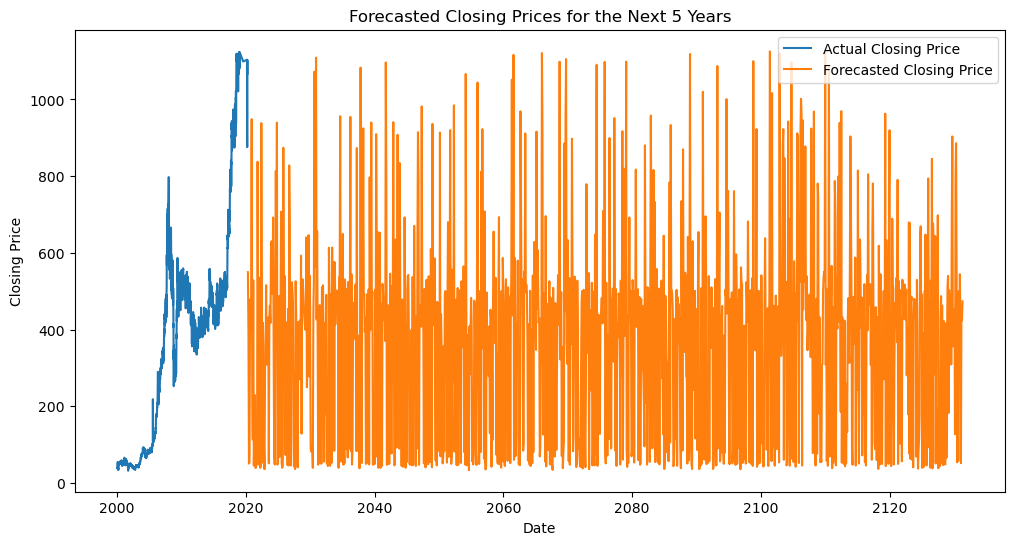

In [221]:
# Plotting the forecasted closing prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Closing Price')
plt.plot(forecast_df.index, forecast_df['Predicted_Close'], label='Forecasted Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Forecasted Closing Prices for the Next 5 Years')
plt.legend()
plt.show()

In [ ]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted_Close': predicted_mean})
forecast_df.set_index('Date', inplace=True)

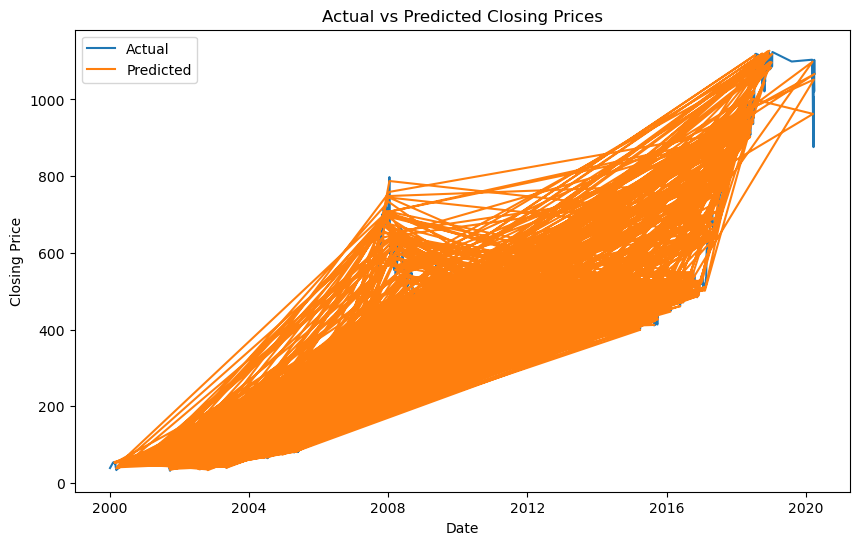

In [210]:
# Plot the predicted closing prices against the actual closing prices
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label='Actual')
plt.plot(X_test_encoded.index, predicted_mean, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.legend()
plt.show()